# **Intersection Analysis**

This notebook contains the necessary code to identify the genes shared between **Xenium Human Immuno-Oncology**, the differentially expressed genes in the **Tumors FA-HNSCC**, and **Tumors HNSCC no FA**.

In [1]:
# Libraries to import

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 
from matplotlib_venn import venn3

In [2]:
# Hubsin FA HNSCC
# Read genes from a file
df_fascc = pd.read_csv("filtered_hubs_by_criteria_fa_hnscc.csv")
df_fascc.head()

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,RPL4,0.477612,0.019612,0.610942,0.146122,0.010910,True,True,True,True,True,5,True,0
1,RPS18,0.472637,0.022993,0.603604,0.137165,0.011024,True,True,True,True,True,5,True,0
2,RPL23A,0.467662,0.028651,0.616564,0.141057,0.010896,True,True,True,True,True,5,True,0
3,RPS23,0.462687,0.024731,0.600000,0.134796,0.010793,True,True,True,True,True,5,True,0
4,RPL9,0.457711,0.015669,0.596439,0.139803,0.010541,True,True,True,True,True,5,True,0


In [3]:
# Hubs in FA HNSCC
hubs_fa_hnscc = df_fascc['Node'].tolist()
print(f"Number of hubs in FA HNSCC: {len(hubs_fa_hnscc)}")

Number of hubs in FA HNSCC: 553


In [6]:
# Hubsin HNSCC
# Read genes from a file
df_hnscc = pd.read_csv("filtered_hubs_by_criteria_hnscc_tcga.csv")
df_hnscc.head()

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,CD4,0.446097,0.391475,0.587336,0.365614,0.048084,True,True,True,True,True,5,True,0
1,CCR7,0.234201,0.064676,0.471930,0.263560,0.022451,True,True,True,True,True,5,True,0
2,CD27,0.200743,0.059949,0.474427,0.224773,0.020400,True,True,True,True,True,5,True,0
3,GZMB,0.163569,0.026218,0.459044,0.217560,0.015554,True,True,True,True,True,5,True,0
4,TYROBP,0.159851,0.111081,0.419657,0.075251,0.022899,True,True,True,True,True,5,True,0


In [7]:
# Hubs in FA HNSCC
hubs_hnscc = df_hnscc['Node'].tolist()
print(f"Number of hubs in HNSCC: {len(hubs_hnscc)}")

Number of hubs in HNSCC: 570


In [14]:
# Xenium genes
# Read genes from a file
df_xenium = pd.read_csv("Xenium_hIO_v1_metadata.csv")
df_xenium.head()

,Gene,Ensemble ID,Num_Probesets,Codewords,Annotation
0,A2M,ENSG00000175899,2,1,NaN
1,ACE2,ENSG00000130234,8,1,Hormone Processing
2,ACTA2,ENSG00000107796,8,1,Stromal Cell
3,ACTB,ENSG00000075624,2,1,Cytoskeleton
4,ADAM28,ENSG00000042980,4,1,B cell


In [15]:
xenium_genes = df_xenium['Gene'].tolist()
print(f"Number of genes in Xenium hIO v1: {len(xenium_genes)}")

Number of genes in Xenium hIO v1: 380


In [71]:
# Antibody list
genes_ab = [
    "ITGB3", "MMP1", "MMP2", "MMP7", "MMP8", "MMP11", "MMP13", "MMP14",
    "MMP17", "MMP19", "MMP28", "TIMP3", "COL1A1", "FN1"
]

print(len(genes_ab))  # 14 genes

14


In [72]:
# Protein list 
proteins = [
    "TIMP1","COL1A1","FAP1","FN1","VIM","COL4A1","MMP9","PANCK","TNC","ACTA2"
]
print(len(proteins))  # 10 proteins

10


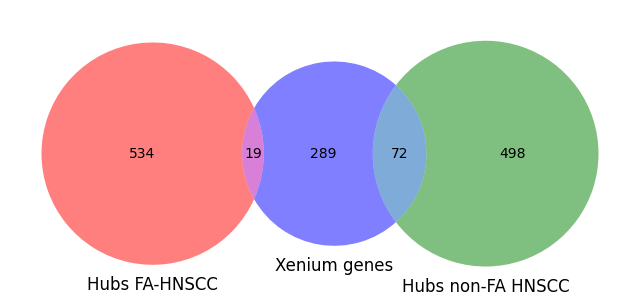

In [16]:
# Make list to contains 
set1 = set(hubs_fa_hnscc)
set2 = set(hubs_hnscc)
set3 = set(xenium_genes)

# PLot Venn diagram
plt.figure(figsize=(8,8))
venn3([set1, set2, set3], set_labels=('Hubs FA-HNSCC', 
                                      'Hubs non-FA HNSCC', 'Xenium genes'), alpha=0.5)

# Show plot
# Save Plot
plt.savefig("venn3_hubs_fa_hnscc_hubs_hnscc_genes_xenium.png", dpi=600)
#plt.title("Intersection of genes between the two methodologies and antibodies")
plt.show()

In [74]:
# Print intersections
print("Intersection between Hubs FA-HNSCC and Hubs HNSCC no FA:", set1.intersection(set2))
print("Intersection between Hubs FA-HNSCC and Xenium genes:", set1.intersection(set3))
print("Intersection between Hubs HNSCC no FA and Xenium genes:", set2.intersection(set3))
print("Intersection between the three sets:", set1.intersection(set2).intersection(set3))

Intersection between Hubs FA-HNSCC and Hubs HNSCC no FA: set()
Intersection between Hubs FA-HNSCC and Xenium genes: {'KRAS', 'MKI67', 'IL1B', 'IL1A', 'NT5E', 'PIK3CA', 'BRAF', 'FGF2', 'MET', 'CD274', 'EGFR', 'CENPF', 'NF1', 'CDK1', 'IL10', 'PTEN', 'HIF1A', 'ITGA1', 'ATM'}
Intersection between Hubs HNSCC no FA and Xenium genes: {'CXCR3', 'IL10RA', 'CD68', 'P2RX1', 'SELL', 'LAG3', 'TBX21', 'CXCL10', 'ITGAE', 'CD4', 'PDCD1', 'CCL13', 'CX3CR1', 'FOXP3', 'IRF8', 'CCL4', 'KLRK1', 'CCR7', 'CDKN2C', 'CD3D', 'CTLA4', 'GZMK', 'ACTB', 'TP53', 'GZMH', 'CD74', 'TIGIT', 'PLA2G7', 'CXCR4', 'FOS', 'CD8A', 'CD2', 'APOE', 'KLRB1', 'GZMB', 'NKG7', 'LCK', 'CORO1A', 'CD38', 'CCR5', 'AKT1', 'CXCR5', 'PRF1', 'CD19', 'CD247', 'IRF1', 'CD79A', 'FCGR3A', 'CTSD', 'CXCL9', 'CD40LG', 'KLRC1', 'CD40', 'TGFB1', 'CD3E', 'TNFRSF17', 'FASLG', 'JUN', 'GZMA', 'IL2RB', 'CDKN1A', 'ERBB2', 'SMAD3', 'CD27', 'NOTCH1', 'CCL2', 'MYD88', 'FLT3LG', 'NOTCH3', 'PLEK', 'SYK', 'CD86'}
Intersection between the three sets: set()


In [75]:
# Save a file with the intersection genes for each pair and the three sets in one file
# and print a number of genes in each intersection
with open("gene_intersections_HNSCC.txt", "w") as f:
    f.write("Intersection between Hubs FA-HNSCC and Hubs HNSCC no FA:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set2))}\n")
    f.write(", ".join(set1.intersection(set2)) + "\n\n")
    
    
    f.write("Intersection between Hubs FA-HNSCC and Xenium genes:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set3))}\n")
    f.write(", ".join(set1.intersection(set3)) + "\n\n")
    
    
    f.write("Intersection between HNSCC no FA and Xenium genes:\n")
    f.write(f"Number of genes in intersection: {len(set2.intersection(set3))}\n")
    f.write(", ".join(set2.intersection(set3)) + "\n\n")
    
    
    f.write("Intersection between the three sets:\n")
    f.write(f"Number of genes in intersection: {len(set1.intersection(set2).intersection(set3))}\n")
    f.write(", ".join(set1.intersection(set2).intersection(set3)) + "\n")
    

print("Intersections saved to gene_intersections_HNSCC.txt")

Intersections saved to gene_intersections_HNSCC.txt


In [9]:
# Wich community this hubs belong to in FA HNSCC
# Show columns in df_fascc
print(df_fascc.columns)

Index(['Node', 'DegreeCentrality', 'BetweennessCentrality',
       'ClosenessCentrality', 'EigenvectorCentrality', 'PageRank',
       'DegreeCentrality_High', 'BetweennessCentrality_High',
       'ClosenessCentrality_High', 'EigenvectorCentrality_High',
       'PageRank_High', 'HubScore', 'IsHub', 'Community'],
      dtype='object')


In [28]:
# Use column Community to find the community of the intersection hubs
intersection_hubs_fahnscc = set1.intersection(set3)
communities_fa_hnscc = df_fascc[df_fascc['Node'].isin(intersection_hubs_fahnscc)][['Node', 'Community']]

# Ensure Jupyter shows all rows
pd.set_option('display.max_rows', None)

print("Communities of intersection hubs in Non-FA HNSCC:", len(communities_fa_hnscc))
print(communities_fa_hnscc.to_string(index=False))

Communities of intersection hubs in Non-FA HNSCC: 19
  Node  Community
  CDK1          1
 CENPF          1
 MKI67          1
  EGFR          2
  PTEN          2
  KRAS          2
PIK3CA          2
  IL1B          2
  IL10          2
 HIF1A          2
   MET          2
  FGF2          2
  BRAF          2
  IL1A          2
 CD274          2
   NF1          2
 ITGA1          2
   ATM          3
  NT5E          5


In [29]:
# Use column Community to find the community of the intersection hubs (non-FA HNSCC)
intersection_hubs_non_fa_hnscc = set2.intersection(set3)
communities_non_fa = df_hnscc[df_hnscc['Node'].isin(intersection_hubs_non_fa_hnscc)][['Node', 'Community']]

# Ensure Jupyter shows all rows
pd.set_option('display.max_rows', None)

print("Communities of intersection hubs in Non-FA HNSCC:", len(communities_non_fa))
print(communities_non_fa.to_string(index=False))

Communities of intersection hubs in Non-FA HNSCC: 72
    Node  Community
     CD4          0
    CCR7          0
    CD27          0
    GZMB          0
    CCL2          0
    LAG3          0
   KLRK1          0
    CD68          0
   TBX21          0
   CD79A          0
    CD38          0
    GZMA          0
    CD8A          0
   KLRB1          0
   IL2RB          0
    GZMK          0
   CCL13          0
   TGFB1          0
   ITGAE          0
    CCR5          0
    NKG7          0
    CD19          0
  FCGR3A          0
   CD247          0
     CD2          0
    GZMH          0
   CTLA4          0
   CXCR3          0
     LCK          0
    SELL          0
   CXCL9          0
   CXCR4          0
   CXCR5          0
    PRF1          0
  IL10RA          0
TNFRSF17          0
   FOXP3          0
    CCL4          0
  CXCL10          0
     SYK          0
  CD40LG          0
  CX3CR1          0
   TIGIT          0
    CD3E          0
    CD3D          0
    CD40          0
   FASL

**Are Pablo's proteins among hubs**?

In [76]:
# Make the intersection between 1-3 (FA-HNSCC) and 2-3 (HNSCC) as new sets
# and then intersect them with the antibodies and proteins
targets_fa_hnscc = set1.intersection(set3)  # Hubs FA-HNSCC and Xenium genes
targets_hnscc = set2.intersection(set3)     # Hubs HNSCC no FA and Xenium genes

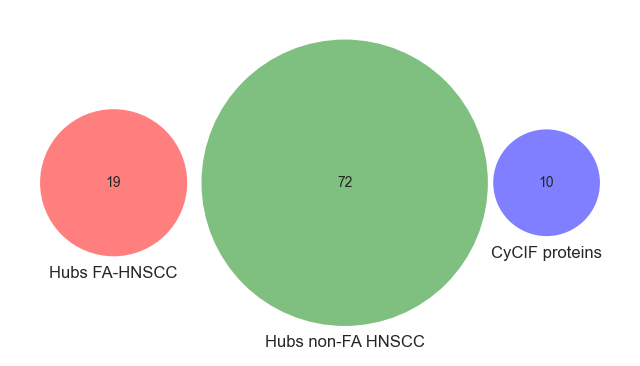

In [104]:
# Make list to contains 
set4 = set(targets_fa_hnscc)
set5 = set(targets_hnscc)
set6 = set(proteins)

# PLot Venn diagram
plt.figure(figsize=(8,8))
venn3([set4, set5, set6], set_labels=('Hubs FA-HNSCC', 'Hubs non-FA HNSCC', 'CyCIF proteins'), alpha=0.5)

# Show plot
# Save Plot
plt.savefig("venn3_hubs_fa_hnscc_hubs_hnscc_cycif_proteins.png", dpi=600)
#plt.title("Intersection of genes between the two methodologies and antibodies")
plt.show()

**Are Pablo´s proteins among Xenium panel?**

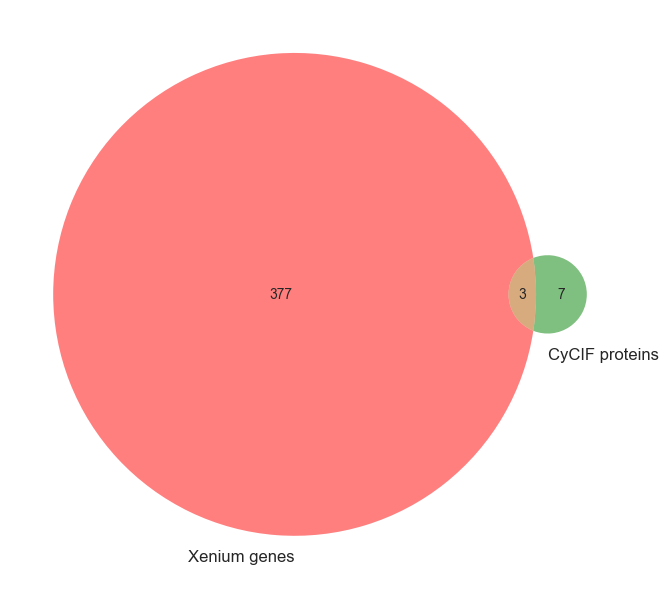

In [100]:
# Pablos's proteins in the Xenium panel

# Plot Venn diagram
plt.figure(figsize=(8,8))
venn2([set3, set6], set_labels=('Xenium genes', 'CyCIF proteins'), alpha=0.5)

# Show plot
# Save Plot
plt.savefig("venn2_xenium_proteins.png", dpi=600)
#plt.title("Pablo's proteins in the Xenium panel")
plt.show()

In [79]:
# Print intersections
print("Intersection between Xenium genes and Proteins:", set3.intersection(set6))

Intersection between Xenium genes and Proteins: {'FN1', 'ACTA2', 'MMP9'}


**Are Pablo's proteins among the DEGs?**

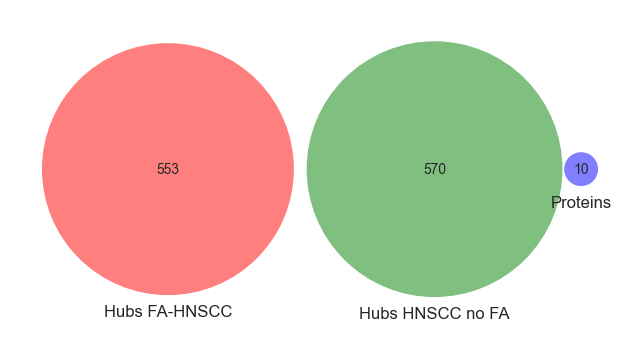

In [80]:
# Pablo's proteins in DEGs FA-HNSCC & HNSCC no FA
# PLot Venn diagram
plt.figure(figsize=(8,8))
venn3([set1, set2, set6], set_labels=('Hubs FA-HNSCC', 'Hubs HNSCC no FA', 'Proteins'), alpha=0.5)

# Show plot
# Save Plot
#plt.savefig("venn3_hubs_fa_hnscc_hubs_hnscc_genes_xenium.png", dpi=600)
#plt.title("Intersection of genes between the two methodologies and antibodies")
plt.show()

**In which communities are hubs shared with Xenium panel?**

In [83]:
# Charge hubs FA-HNSCC file
df_fascc.head()

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,RPL4,0.477612,0.019612,0.610942,0.146122,0.010910,True,True,True,True,True,5,True,0
1,RPS18,0.472637,0.022993,0.603604,0.137165,0.011024,True,True,True,True,True,5,True,0
2,RPL23A,0.467662,0.028651,0.616564,0.141057,0.010896,True,True,True,True,True,5,True,0
3,RPS23,0.462687,0.024731,0.600000,0.134796,0.010793,True,True,True,True,True,5,True,0
4,RPL9,0.457711,0.015669,0.596439,0.139803,0.010541,True,True,True,True,True,5,True,0


In [86]:
# In wich community are hubs FA-HNSCC that are in Xenium panel
df_fascc[df_fascc['Node'].isin(targets_fa_hnscc)]

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
53,CDK1,0.564885,0.143923,0.629808,0.186680,0.027402,True,True,True,True,True,5,True,1
60,CENPF,0.404580,0.014943,0.545833,0.164983,0.016297,True,False,True,True,True,4,True,1
83,MKI67,0.259542,0.000761,0.505792,0.129820,0.010438,True,False,True,True,False,3,True,1
86,EGFR,0.120226,0.205956,0.413209,0.313351,0.015623,True,True,True,True,True,5,True,2
87,PTEN,0.082037,0.099799,0.384030,0.243858,0.009709,True,True,True,True,True,5,True,2
90,KRAS,0.060820,0.038736,0.367082,0.192302,0.007085,True,True,True,True,True,5,True,2
92,PIK3CA,0.056577,0.038520,0.371324,0.195827,0.006425,True,True,True,True,True,5,True,2
93,IL1B,0.055163,0.034344,0.353323,0.171769,0.006152,True,True,True,True,True,5,True,2
105,IL10,0.039604,0.021640,0.341876,0.117774,0.004731,True,True,True,True,True,5,True,2
107,HIF1A,0.038190,0.030427,0.355813,0.143246,0.005015,True,True,True,True,True,5,True,2


In [87]:
# How many nodes is it this?
print(f"Number of hubs FA-HNSCC in Xenium panel: {len(df_fascc[df_fascc['Node'].isin(targets_fa_hnscc)])}")

Number of hubs FA-HNSCC in Xenium panel: 19


In [88]:
# Show HNSCC no FA  dataset
df_hnscc.head()

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,CD4,0.446097,0.391475,0.587336,0.365614,0.048084,True,True,True,True,True,5,True,0
1,CCR7,0.234201,0.064676,0.471930,0.263560,0.022451,True,True,True,True,True,5,True,0
2,CD27,0.200743,0.059949,0.474427,0.224773,0.020400,True,True,True,True,True,5,True,0
3,GZMB,0.163569,0.026218,0.459044,0.217560,0.015554,True,True,True,True,True,5,True,0
4,TYROBP,0.159851,0.111081,0.419657,0.075251,0.022899,True,True,True,True,True,5,True,0


Session Info:

In [94]:
# In wich community are hubs HNSCC no FA that are in Xenium panel
df_filtered = df_hnscc[df_hnscc['Node'].isin(targets_hnscc)]

# Mostrar todas las filas en la salida de Jupyter
pd.set_option('display.max_rows', None)

df_filtered

,Node,DegreeCentrality,BetweennessCentrality,ClosenessCentrality,EigenvectorCentrality,PageRank,DegreeCentrality_High,BetweennessCentrality_High,ClosenessCentrality_High,EigenvectorCentrality_High,PageRank_High,HubScore,IsHub,Community
0,CD4,0.446097,0.391475,0.587336,0.365614,0.048084,True,True,True,True,True,5,True,0
1,CCR7,0.234201,0.064676,0.471930,0.263560,0.022451,True,True,True,True,True,5,True,0
2,CD27,0.200743,0.059949,0.474427,0.224773,0.020400,True,True,True,True,True,5,True,0
3,GZMB,0.163569,0.026218,0.459044,0.217560,0.015554,True,True,True,True,True,5,True,0
5,CCL2,0.159851,0.050101,0.449082,0.155941,0.015775,True,True,True,True,True,5,True,0
7,LAG3,0.148699,0.052123,0.445364,0.158974,0.016105,True,True,True,True,True,5,True,0
8,KLRK1,0.137546,0.055546,0.459044,0.144946,0.015145,True,True,True,True,True,5,True,0
9,CD68,0.130112,0.041673,0.449833,0.125988,0.014650,True,True,True,True,True,5,True,0
11,TBX21,0.126394,0.023195,0.448333,0.170533,0.012831,True,True,True,True,True,5,True,0
12,CD79A,0.122677,0.067629,0.435275,0.085732,0.014772,True,True,True,True,True,5,True,0


In [95]:
# How many nodes is it this?# Save result to a file
print(f"Number of hubs HNSCC no FA in Xenium panel: {len(df_hnscc[df_hnscc['Node'].isin(targets_hnscc)])}")

Number of hubs HNSCC no FA in Xenium panel: 72


In [81]:
# Información de la sesión
!python --version

Python 3.12.1


In [82]:
!pip list

Package                   Version
------------------------- ---------
adjustText                1.0.4
asttokens                 2.4.1
attrs                     25.3.0
certifi                   2025.4.26
charset-normalizer        3.4.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.0
cycler                    0.12.1
debugpy                   1.8.2
decorator                 5.1.1
docopt                    0.6.2
et_xmlfile                2.0.0
executing                 2.0.1
fastjsonschema            2.21.1
fonttools                 4.47.2
ftpretty                  0.4.0
goatools                  1.4.12
gseapy                    1.1.8
idna                      3.10
ipykernel                 6.29.5
ipython                   8.26.0
jedi                      0.19.1
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2025.4.1
jupyter_client            8.6.2
jupyter_core              5.7.2
kiwisolver         


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
